In this tutorial we will learn:

1) What is the biomass objective function?
2) Basic simulation of growth in aerobic vs anaerobic conditions

In [39]:
import cobra
from cobra import Model, Reaction, Metabolite
import escher
import escher.urls
import cobra.test
import json
import os
from IPython.display import HTML
import pandas as pd

## In this tutorial we will learn how to:

#### 1) Run Flux balance analysis
#### 2) Visualize the flux state in an embedded escher map
#### 3) Simulate aerobic and anaerobic conditions

In [54]:
ecoli = cobra.io.json.from_json(escher.plots.model_json_for_name('e_coli_core'))

# The Biomass Function

### A biomass reaction represents the drain of precursors and macromolecular building blocks for bacterial growth in a certain environment 

In [75]:
IJO = cobra.io.load_json_model('iJO1366.json')
pd.DataFrame({x.name: y for x,y in IJO.reactions.BIOMASS_Ec_iJO1366_WT_53p95M.metabolites.items()}.items(), columns = ['Metabolite', 'Mass fraction']).iloc[:20]

,Metabolite,Mass fraction
0,Glycogen,-0.154187
1,"Phosphatidylethanolamine (dioctadec-11-enoyl, ...",-0.012747
2,Sulfate,-0.004126
3,Mn2+,-0.000658
4,"Phosphatidylglycerol (dioctadec-11-enoyl, n-C1...",-0.002288
5,Coenzyme A,-0.000168
6,Siroheme,-0.000223
7,Ammonium,-0.012379
8,Succinyl-CoA,-0.000098
9,L-Serine,-0.209684


In [62]:
ecoli.reactions.BIOMASS_Ecoli_core_w_GAM.reaction

'1.496 3pg_c + 3.7478 accoa_c + 59.81 atp_c + 0.361 e4p_c + 0.0709 f6p_c + 0.129 g3p_c + 0.205 g6p_c + 0.2557 gln__L_c + 4.9414 glu__L_c + 59.81 h2o_c + 3.547 nad_c + 13.0279 nadph_c + 1.7867 oaa_c + 0.5191 pep_c + 2.8328 pyr_c + 0.8977 r5p_c --> 59.81 adp_c + 4.1182 akg_c + 3.7478 coa_c + 59.81 h_c + 3.547 nadh_c + 13.0279 nadp_c + 59.81 pi_c'

# What is Flux Balance Analysis?

Think of a pipe system (This is the equivalent of the metabolic network that you have put together at the reconstruction step)

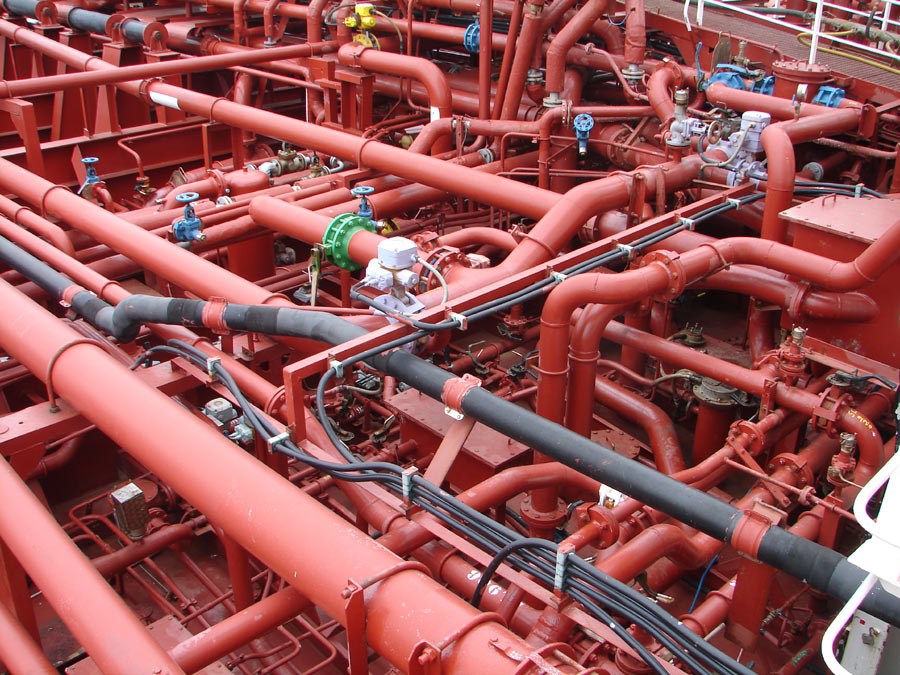

In [64]:
from IPython.display import Image
Image(filename='Piping_system_on_a_chemical_tanker.jpg')

# Run Flux balance analysis

In [67]:
ecoli.optimize().f

0.8739215069684307

# Let's look at the E. coli core and how flux changes depending on surrounding conditions

In [76]:
generalMap= escher.Builder(map_name='e_coli_core.Core metabolism')
generalMap.display_in_notebook()

# We are optimizing our system of linear equations to the biomass function to see what the maximum growth rate is

In [79]:
solution = ecoli.optimize()
print('Growth rate: %.2f' % solution.f)
sol=dict(solution.fluxes)

Growth rate: 0.87


In [80]:
escher_map = escher.Builder(map_json='e_coli_core.Core metabolism.json', reaction_data=sol,
                   # color and size according to the absolute value
                   reaction_styles=['color', 'size', 'abs', 'text'],
                   # change the default colors
                   reaction_scale=[{'type': 'min', 'color': '#cccccc', 'size': 4},
                                   {'type': 'mean', 'color': '#0000dd', 'size': 20},
                                   {'type': 'max', 'color': '#ff0000', 'size': 40}],
                   # only show the primary metabolites
                   hide_secondary_metabolites=True)


escher_map.display_in_notebook()


# Change the conditions from aerobic to anerobic

In [49]:
ecoli.reactions.EX_o2_e.lower_bound=0
ecoli.reactions.EX_o2_e.upper_bound=0

In [50]:
solution = ecoli.optimize()
print('Growth rate: %.2f' % solution.f)
sol=dict(solution.fluxes)

Growth rate: 0.21


In [78]:
escher_map = escher.Builder(map_json='e_coli_core.Core metabolism.json',reaction_data=sol,
                   # color and size according to the absolute value
                   reaction_styles=['color', 'size', 'abs', 'text'],
                   # change the default colors
                   reaction_scale=[{'type': 'min', 'color': '#cccccc', 'size': 4},
                                   {'type': 'mean', 'color': '#0000dd', 'size': 20},
                                   {'type': 'max', 'color': '#ff0000', 'size': 40}],
                   # only show the primary metabolites
                   hide_secondary_metabolites=True)
escher_map.display_in_notebook()

# Note how the absence of oxygen has resulted in no flux through reactions of the TCA cycle